## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with 20 News Group Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on the News Group Dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Link to the original dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

You can also import the dataset from sklearn.datasets

In [3]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics


In [2]:
# Import the 20 news group dataset utilizing sklearn library

from sklearn.datasets import fetch_20newsgroups
mydata_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'))

mydata_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'))


In [3]:
# Print the news groups(target) in the dataset

pprint(list(mydata_train.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [4]:
# What is the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

<class 'sklearn.utils.Bunch'>
<class 'sklearn.utils.Bunch'>


In [5]:
# Check the length of the data

print(len(mydata_train.data))
print(len(mydata_train.filenames))
print(len(mydata_test.data))
print(len(mydata_test.filenames))

11314
11314
7532
7532


### Expected Output: 
11314

11314

7532

7532

## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref:https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [6]:
text = mydata_train.data
test = mydata_test.data

## Preprocessing the Corpus

In [7]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# Preprocessing the data


lines = [] 
word_list = [] 
 
for line in text:
    #tokenize the text documents and update the lists word_list and lines
    x = [i.lower() for  i in word_tokenize(line) if i.isalpha()]
    lines.append(x)
    for word in x:
        if word not in word_list:
            word_list.append(word)
    

 

# Make sure the word_list contains unique tokens
word_list = set(word_list)

# Calculate the total documents present in the corpus
total_docs = len(text)
 
#Create a dictionary to keep track of index of each word
dict_idx = {}
word_list=list(word_list)
for index in range(len(word_list)):
  dict_idx[word_list[index]]=index

In [9]:
# Create a frequency dictionary
 
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    
    freq_word = {}
    for word in word_list:
        freq_word[word] = 0
        for line in lines:
            if word in line:
                freq_word[word] += 1

    
    return freq_word

In [ ]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

freq_word

{'epitome': 2,
 'antagonize': 1,
 'commlib': 1,
 'stoopid': 1,
 'cwcursor': 1,
 'saviors': 1,
 'sheraton': 1,
 'icz': 1,
 'fvs': 1,
 'agha': 1,
 'rops': 1,
 'poole': 1,
 'soviets': 5,
 'ege': 1,
 'numourous': 1,
 'heard': 485,
 'chile': 2,
 'dave': 148,
 'stinks': 3,
 'encylcopedia': 1,
 'wilkinson': 5,
 'imakefile': 8,
 'rostamian': 1,
 'consultant': 11,
 'divisional': 7,
 'thelike': 1,
 'revelation': 47,
 'reduces': 18,
 'regedit': 3,
 'unto': 22,
 'raffle': 2,
 'pupils': 3,
 'beratement': 1,
 'shoham': 2,
 'deluxeý': 2,
 'campground': 1,
 'torremans': 1,
 'mut': 1,
 'anticipate': 5,
 'nonlicensee': 1,
 'autolisp': 1,
 'hds': 5,
 'outplayed': 1,
 'cedex': 2,
 'gino': 1,
 'shmoozing': 1,
 'insignia': 3,
 'bosse': 1,
 'dispensationalism': 2,
 'fabian': 3,
 'devonshire': 1,
 'downtown': 16,
 'infighting': 4,
 'appop': 1,
 'kalamazoo': 2,
 'unalienable': 3,
 'holes': 53,
 'greatwave': 1,
 'interpolation': 7,
 'illuminating': 5,
 'fontlist': 1,
 'leonov': 2,
 'opeb': 1,
 'popupshell': 2,


In [10]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)



print(freq_word)

{'epitome': '2', 'antagonize': '1', 'commlib': '1', 'stoopid': '1', 'cwcursor': '1', 'saviors': '1', 'sheraton': '1', 'icz': '1', 'fvs': '1', 'agha': '1', 'rops': '1', 'poole': '1', 'soviets': '5', 'ege': '1', 'numourous': '1', 'heard': '485', 'chile': '2', 'dave': '148', 'stinks': '3', 'encylcopedia': '1', 'wilkinson': '5', 'imakefile': '8', 'rostamian': '1', 'consultant': '11', 'divisional': '7', 'thelike': '1', 'revelation': '47', 'reduces': '18', 'regedit': '3', 'unto': '22', 'raffle': '2', 'pupils': '3', 'beratement': '1', 'shoham': '2', 'deluxeý': '2', 'campground': '1', 'torremans': '1', 'mut': '1', 'anticipate': '5', 'nonlicensee': '1', 'autolisp': '1', 'hds': '5', 'outplayed': '1', 'cedex': '2', 'gino': '1', 'shmoozing': '1', 'insignia': '3', 'bosse': '1', 'dispensationalism': '2', 'fabian': '3', 'devonshire': '1', 'downtown': '16', 'infighting': '4', 'appop': '1', 'kalamazoo': '2', 'unalienable': '3', 'holes': '53', 'greatwave': '1', 'interpolation': '7', 'illuminating': '5',

In [11]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    N = len(document)
    occurance = len([token for token in document if token == word])
    tf= occurance/N
    return tf

In [12]:
# Create a function to calculate the Inverse Document Frequency
 
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    #FREQ USAGE
    if word in dict_idx.keys():
        word_occurance = dict_idx[word] 
    else:
        word_occurance = 1
    idf= (np.log(total_docs/(word_occurance+1)))+1
    return idf

In [13]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    tf_idf_vec = np.zeros((len(word_list),))
    for word in sentence:
        tf = term_frequency(sentence,word)
        idf = inverse_df(word)
         
        value = tf*idf
        tf_idf_vec[dict_idx[word]] = value
        
    return tf_idf_vec

In [14]:
#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus

vectors = []
for line in lines:
    vec = tfidf(line,dict_idx)
    vectors.append(vec)
 
print(vectors[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


[0. 0. 0. ... 0. 0. 0.]


## Multinomial Naive Bayes (10 Points)

In [14]:
#Fit a Multinomial Naive Bayes Model on our dataset
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(vectors,mydata_train.target)


In [14]:
#Perform testing on the train dataset

pred = model.predict(mydata_test)

In [15]:
#Calculate the F1 Score and the Accuracy
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
F1_score = f1_score(pred,mydata_test.target)
Accuracy = accuracy_score(pred,mydata_test.target)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.9622261383654144
Accuracy:  0.9358234592771256


### Expected Output:
F1 Score: 0.9533633964397735

Accuracy: 0.9524482941488421

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [16]:
# install libraries
#pip install wikipedia
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [17]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [18]:
!pip install wikipedia

import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics = ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football",'Asia', 'Cricket','Music','Concentration','Art','Cinema']

# list of articles to be downloaded
articles = []
for top in topics:
  result=wikipedia.search(top)
  if len(result)<4:
    for ind in range(len(result)):
      articles.append(result[ind])
  
  else:
    for ind in range(4):
      articles.append(result[ind])
  





#WIKIPEDIA SEARCH, GIVE MANUAL TITLES WIKIPEDIA.SEARCH API

# download and store articles (summaries) in this variable
data = []
for article in articles:
  try:
    data.append(wikipedia.summary(title=article))
  except WikipediaException:
        print(f"Skipping {article}")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=1937993a8899109b52562fb9dd548d6c87965dbc7cdf779798a03891665e5667
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia
Skipping Northeastern University
Skipping Machine learning


/usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.7/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Skipping Data
Skipping Bank of America
Skipping Visa Inc.
Skipping Bank
Skipping Swimming (sport)
Skipping Tennis
Skipping FIFA
Skipping Asia
Skipping Southeast Asia
Skipping Music
Skipping Music (disambiguation)
Skipping Art
Skipping ART
Skipping .art
Skipping Art Deco
Skipping Cinema


### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):** 
For this application, it is chosen to clean the data so as to remove stop words and other redundant text that would not be so helpful to cluster the data. This would have words that strongly indicate the relevancy to the topic remain and help in clustering.[link text](https://)

In [19]:
# You can use Assignment 1's clean message function
import numpy as np
import math
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
nltk.download('all')
lemmatizer = WordNetLemmatizer()
stopwords_english = stopwords.words('english')

def clean_message(message):
    message=message.lower()
    message = re.sub(r'[^\w\s]', '', message)
    message = " ".join([word for word in message.split() if word not in stopwords.words('english')])
    message= word_tokenize(message)
    message_clean = [lemmatizer.lemmatize(word) for word in message]
    message_cleaned=" ".join([word for word in message_clean])
    return message_cleaned



[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.

In [20]:
clean_new_data = [clean_message(message) for message in data]
print(clean_new_data)

['natural language processing nlp subfield linguistics computer science artificial intelligence concerned interaction computer human language particular program computer process analyze large amount natural language data goal computer capable understanding content document including contextual nuance language within technology accurately extract information insight contained document well categorize organize document challenge natural language processing frequently involve speech recognition naturallanguage understanding naturallanguage generation', 'neuropsychology linguistics philosophy language natural language ordinary language language evolved naturally human use repetition without conscious planning premeditation natural language take different form speech signing distinguished constructed formal language used program computer study logic', 'following outline provided overview topical guide naturallanguage processing naturallanguage processing computer activity computer entailed 

### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')


In [22]:
tfidf_wm = tfidfvectorizer.fit_transform(clean_new_data)

In [23]:
print(tfidf_wm.shape)

(79, 3350)


In [25]:
X=tfidf_wm
print(X.shape)

(79, 3350)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [26]:
from sklearn.manifold import TSNE

# call TSNE() to fit the data
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(tfidf_wm)


In [27]:
print(X_embedded)

[[  3.0562296    5.649224  ]
 [  3.0799441    4.948405  ]
 [  3.0956159    6.4915195 ]
 [  2.9532409    7.495935  ]
 [ -0.17940485   4.6846232 ]
 [ -1.3084794    4.466269  ]
 [ -1.1576203    3.3501315 ]
 [ -1.5876545    6.0469575 ]
 [ -1.0279341    6.624475  ]
 [ -1.7946278    7.4296823 ]
 [ -2.4747047    6.9644737 ]
 [  0.8226511    1.4698707 ]
 [ -0.77711487   0.5697024 ]
 [  0.21973255   1.5656962 ]
 [  1.1494216    0.8118172 ]
 [ -5.2394314    3.4376142 ]
 [ -5.1447177    4.374722  ]
 [ -4.03715      3.3103104 ]
 [ -5.7498417    2.9693394 ]
 [ -6.8403935    0.64879215]
 [ -7.998023     1.0845484 ]
 [ -7.406666     1.0208607 ]
 [  5.538475    -4.7487283 ]
 [  1.995998    -7.5557466 ]
 [  2.7487159   -7.9246964 ]
 [  2.2936685    2.7288501 ]
 [ -4.0619884   -4.070096  ]
 [ -3.8746638   -4.2431936 ]
 [  0.06301307 -10.040203  ]
 [  3.4384873   -9.122914  ]
 [  1.6184468   -9.648384  ]
 [  0.39666542  -9.9720955 ]
 [  0.40172225  -6.429106  ]
 [ -0.45228016  -7.8176312 ]
 [  1.37111   

In [28]:
X_x=[]
for ind in range(len(X_embedded)):
  X_x.append(X_embedded[ind][0])

In [29]:
X_y=[]
for ind in range(len(X_embedded)):
  X_y.append(X_embedded[ind][1])

Plot and annotate the points with different markers for different expected groups.

In [30]:
tfidf_wm=pd.DataFrame(tfidf_wm)

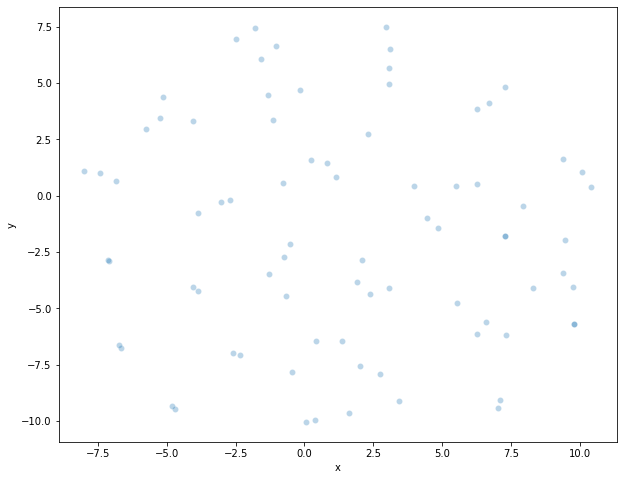

In [31]:
import matplotlib.pyplot as plt

tfidf_wm['x'] = X_x
tfidf_wm['y'] = X_y
# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))

sns.scatterplot(
    x="x", y="y",
    data=tfidf_wm,
    legend="full",
    alpha=0.3
)

In [33]:
import math
# Getting values for X-coord and Y-coord 

X_cd = []
Y_cd = []

for values in X_embedded:
  X_cd.append(values[0])
  Y_cd.append(values[1])


labels = ['Cat_{}'.format(math.ceil(char/16)) for char in range(1, len(X_embedded)+1)]


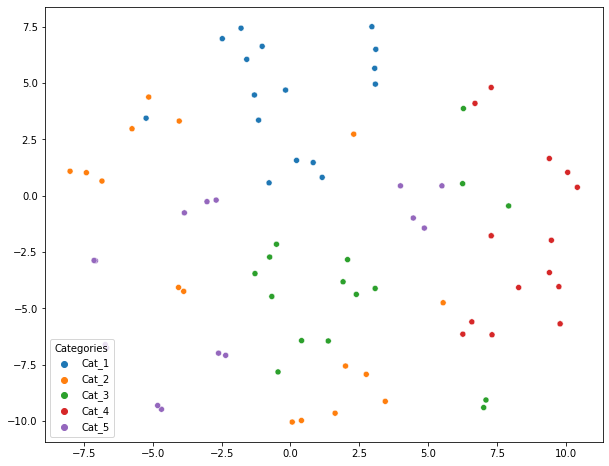

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns 

# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))

# colours = sns.color_palette("bright", 3)

sns.scatterplot(X_cd, Y_cd, hue=labels , legend="full", alpha=1)
plt.legend(loc='lower left', title='Categories')

**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
  There is no accurate clustering by T-SNE. But relates topic articles are located close by.  There are some anomalies as well where certain topic articles are placed close by other category.


# Question 3 Building Neural Networks

### We are gonna use Emotions Dataset for this task. We need to classify the given text into different kind of emotions like happy,sad,anger etc.., 

### We are providing train.txt and val.txt files along with this notebook. 

### Library Imports and Utility functions

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('all')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_pe

### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [5]:
# Import the train.txt and val.txt file into pandas dataframe format 
train_data=pd.read_csv('train.txt', sep=';', header=None, names=['Text','Emotion'])
val_data=pd.read_csv('val.txt', sep=';', header=None, names=['Text','Emotion'])

# train 

# validation

# and printout the train.shape and validation.shape 
print(train_data.shape)
print(val_data.shape)

# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)

(16000, 2)
(2000, 2)


In [6]:
# clean the text in the train and validation dataframes using the clean_text function provided above

train_data['Text']=train_data['Text'].apply(clean_text)

In [7]:
val_data['Text']=val_data['Text'].apply(clean_text)

In [8]:
val_data['Emotion'].unique()

array(['sadness', 'love', 'anger', 'joy', 'fear', 'surprise'],
      dtype=object)

In [9]:
train_data['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [10]:
# initialise count vectorizer from sklearn module with default parameter
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X1_train = vectorizer.fit_transform(train_data['Text'])
X1_test=vectorizer.transform(val_data['Text'])

# fit on train dataset and transform both train and validation dataset

In [11]:
X1_train.dtype

dtype('int64')

In [12]:
X1_train

<16000x13457 sparse matrix of type '<class 'numpy.int64'>'
	with 144320 stored elements in Compressed Sparse Row format>

In [13]:
# initialise tfidf vectorizer from sklearn module with default parameter
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer1 = TfidfVectorizer()
X2_train = vectorizer1.fit_transform(train_data['Text'])
X2_test=vectorizer1.transform(val_data['Text'])

# fit on train dataset and transform both train and validation dataset

In [14]:
X2_train=X2_train.todense()
X2_test=X2_test.todense()

In [15]:
X2_train = pd.DataFrame(X2_train)
X2_test = pd.DataFrame(X2_test)

In [16]:
X1_train=X1_train.todense()
X1_test=X1_test.todense()

In [17]:
X1_train = pd.DataFrame(X1_train)
X1_test = pd.DataFrame(X1_test)

In [18]:
print(X1_train)

       0      1      2      3      4      5      6      7      8      9      \
0          0      0      0      0      0      0      0      0      0      0   
1          0      0      0      0      0      0      0      0      0      0   
2          0      0      0      0      0      0      0      0      0      0   
3          0      0      0      0      0      0      0      0      0      0   
4          0      0      0      0      0      0      0      0      0      0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
15995      0      0      0      0      0      0      0      0      0      0   
15996      0      0      0      0      0      0      0      0      0      0   
15997      0      0      0      0      0      0      0      0      0      0   
15998      0      0      0      0      0      0      0      0      0      0   
15999      0      0      0      0      0      0      0      0      0      0   

       ...  13447  13448  13449  13450  13451  1345

In [19]:
# initialise label encoder from sklearn module
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y_train=le.fit_transform(train_data['Emotion'])
y_train=pd.DataFrame(y_train, columns = ["Emotion"])
y_test=le.transform(val_data['Emotion'])
y_test=pd.DataFrame(y_test, columns = ["Emotion"])
# fit on train labels and transform both train and validation labels

In [20]:
# convert the labels into one hot encoding form
import numpy as np
enc = preprocessing.OneHotEncoder()
y_train=pd.DataFrame(enc.fit_transform(y_train[['Emotion']]).toarray())



In [21]:
y_test=pd.DataFrame(enc.transform(y_test[['Emotion']]).toarray())

In [22]:
X1_train.shape

(16000, 13457)

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [23]:
import tensorflow as tf

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):

  # Defining the model
  model = tf.keras.models.Sequential()

  # layer 1 : input layer
  model.add(tf.keras.Input((X.shape[1],)))

  # layer 2 : add the dense layer with 2048 units and relu activation
  model.add(tf.keras.layers.Dense(2048, activation = 'relu'))

  # layer 3 : add the dropout layer with dropout rate of 0.5
  model.add(tf.keras.layers.Dropout(0.5))
  
  # layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization
  model.add(tf.keras.layers.Dense(1024, activation = 'tanh', kernel_regularizer='l2'))

  # layer 5 : add the dropout layer with dropout rate of 0.5
  model.add(tf.keras.layers.Dropout(0.5))

  # layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization
  model.add(tf.keras.layers.Dense(512, activation = 'tanh', kernel_regularizer = 'l2'))

  # layer 7 : add the dropout layer with dropout rate of 0.5
  model.add(tf.keras.layers.Dropout(0.5))

  # layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization
  model.add(tf.keras.layers.Dense(256, activation = 'tanh', kernel_regularizer = 'l2'))

  # layer 9 : add the dropout layer with dropout rate of 0.5
  model.add(tf.keras.layers.Dropout(0.5))

  # layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization
  model.add(tf.keras.layers.Dense(128, activation = 'tanh', kernel_regularizer = 'l2'))

  # layer 11 : add the dropout layer with dropout rate of 0.5
  model.add(tf.keras.layers.Dropout(0.5))

  # layer 12 : output layer with units equal to number of classes and activation as softmax
  model.add(tf.keras.layers.Dense(6, activation = 'softmax'))

  # use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy 
  model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

  return model


In [24]:
# call the build_model function and initialize the model

model = build_model(X1_train)

In [25]:
type(y_train)

pandas.core.frame.DataFrame

In [26]:
# train and validate the model on the count vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)
history = model.fit(X1_train, y_train ,batch_size = 64, epochs = 10, validation_data = (X1_test, y_test))

Epoch 1/10
250/250 [==============================] - 9s 18ms/step - loss: 4.7766 - accuracy: 0.5944 - precision: 0.8001 - recall: 0.4054 - auc: 0.8866 - val_loss: 1.0933 - val_accuracy: 0.7815 - val_precision: 0.8540 - val_recall: 0.6785 - val_auc: 0.9573
Epoch 2/10
250/250 [==============================] - 4s 14ms/step - loss: 0.8543 - accuracy: 0.8242 - precision: 0.8636 - recall: 0.7746 - auc: 0.9758 - val_loss: 0.9388 - val_accuracy: 0.8035 - val_precision: 0.8373 - val_recall: 0.7745 - val_auc: 0.9633
Epoch 3/10
250/250 [==============================] - 4s 14ms/step - loss: 0.6635 - accuracy: 0.8903 - precision: 0.9080 - recall: 0.8724 - auc: 0.9889 - val_loss: 0.9061 - val_accuracy: 0.8220 - val_precision: 0.8471 - val_recall: 0.8035 - val_auc: 0.9682
Epoch 4/10
250/250 [==============================] - 4s 14ms/step - loss: 0.5732 - accuracy: 0.9233 - precision: 0.9337 - recall: 0.9119 - auc: 0.9936 - val_loss: 0.9351 - val_accuracy: 0.8475 - val_precision: 0.8652 - val_recal

In [27]:
y1_pred = model.predict(X1_test)


In [28]:
y_1_pred = [np.argmax(lst) for lst in y1_pred]


In [29]:
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
figure(figsize = (12,10))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

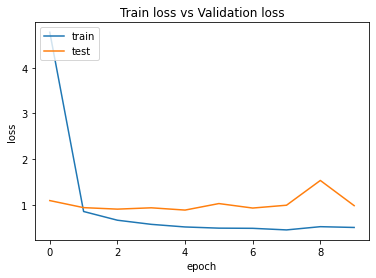

In [30]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Train loss vs Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Loss becomes constant for test set but showed anomaly behavior at 8th epoch and then declined. Loss doesn't show much of a variation for train set after the first epoch.

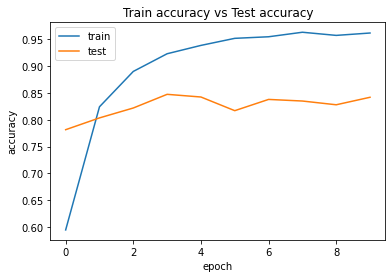

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Train accuracy vs Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Accuracy of test is lower than train after one epochs.

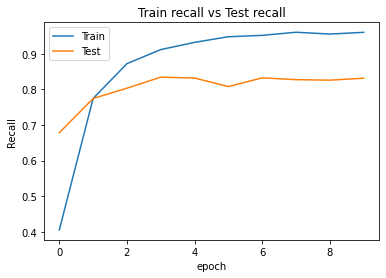

In [32]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])

plt.title('Train recall vs Test recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

Recall of test is lower than train after one epochs.

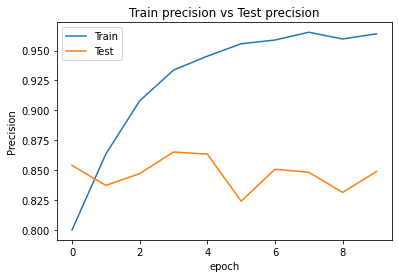

In [33]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])

plt.title('Train precision vs Test precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

Precision of test is lower than train after one epochs.

<function matplotlib.pyplot.show>

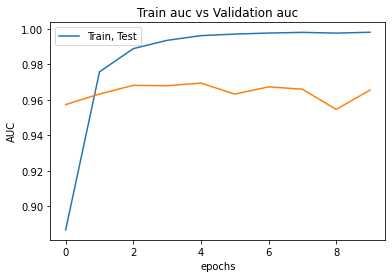

In [34]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])

plt.title('Train auc vs Validation auc')
plt.ylabel('AUC')
plt.xlabel('epochs')
plt.legend(['Train, Test'], loc = 'upper left')
plt.show

AUC of test is lower than train after one epochs.

In [35]:
# again call the build_model function and initialize the model
model1 = build_model(X2_train)

In [36]:
# train and validate the model on the tfidf vectors of text which we have created initially for 10 epochs, 
# adjust batch size according to your computation power (suggestion use : 8)
history1 = model1.fit(X2_train, y_train ,batch_size = 64, epochs = 10, validation_data = (X2_test, y_test))

Epoch 1/10
250/250 [==============================] - 6s 17ms/step - loss: 3.5906 - accuracy: 0.3807 - precision_1: 0.5781 - recall_1: 0.1064 - auc_1: 0.7954 - val_loss: 1.2755 - val_accuracy: 0.4980 - val_precision_1: 0.6578 - val_recall_1: 0.2845 - val_auc_1: 0.8725
Epoch 2/10
250/250 [==============================] - 4s 14ms/step - loss: 1.1393 - accuracy: 0.5943 - precision_1: 0.7217 - recall_1: 0.4257 - auc_1: 0.9055 - val_loss: 1.1692 - val_accuracy: 0.6110 - val_precision_1: 0.7424 - val_recall_1: 0.4855 - val_auc_1: 0.9034
Epoch 3/10
250/250 [==============================] - 4s 14ms/step - loss: 0.9711 - accuracy: 0.6885 - precision_1: 0.7763 - recall_1: 0.6019 - auc_1: 0.9410 - val_loss: 1.1960 - val_accuracy: 0.6555 - val_precision_1: 0.7608 - val_recall_1: 0.5265 - val_auc_1: 0.9097
Epoch 4/10
250/250 [==============================] - 4s 14ms/step - loss: 0.8664 - accuracy: 0.7394 - precision_1: 0.8042 - recall_1: 0.6688 - auc_1: 0.9581 - val_loss: 1.2413 - val_accuracy: 

In [37]:
y2_pred = model1.predict(X2_test)


In [38]:
y_2_pred = [np.argmax(lst) for lst in y2_pred]


In [39]:
figure(figsize = (12,10))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

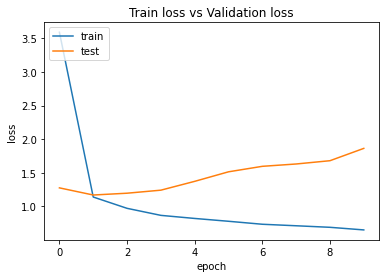

In [40]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.title('Train loss vs Validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Loss is on decline for test set after 2 epochs but loss increases for test set.

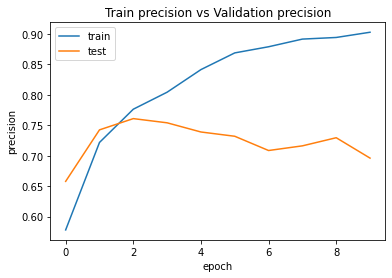

In [41]:
plt.plot(history1.history['precision_1'])
plt.plot(history1.history['val_precision_1'])

plt.title('Train precision vs Validation precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Precison on train set increases with epoch but precision of validation set is lower than train after 2 epochs.

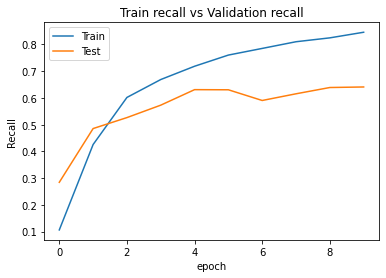

In [42]:
plt.plot(history1.history['recall_1'])
plt.plot(history1.history['val_recall_1'])

plt.title('Train recall vs Validation recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

Recall on train set increases with epoch but precision of validation set is lower than train after 2 epochs.

<function matplotlib.pyplot.show>

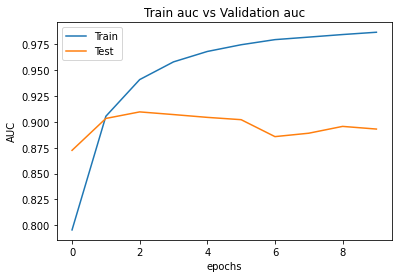

In [46]:
plt.plot(history1.history['auc_1'])
plt.plot(history1.history['val_auc_1'])

plt.title('Train auc vs Validation auc')
plt.ylabel('AUC')
plt.xlabel('epochs')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show

AUC on train set increases with epoch but precision of validation set is lower than train after 1 epochs.

In [44]:
print(history1.history.keys())

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'auc_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1', 'val_auc_1'])


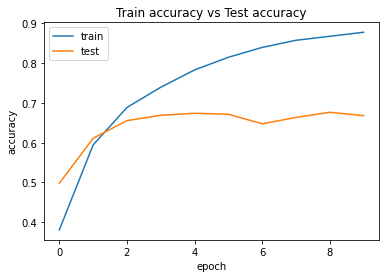

In [45]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])

plt.title('Train accuracy vs Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Accuracy on train set increases with epoch but precision of validation set is lower than train after 1 epochs.

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**
Count Vectorizer just stores the number of occurences of  words in the vocabulary as a vector. 

Whereas TF-IDF stores the importance of the word to documents by combining the term frequency(count of a word in considered document) and Inverse document frequency(words that occure in less number of documents have higher weight).

Word2Vec and Glove are neural embeddings and rely more representing the context of words.

For Word2Vec similar words have similar kind of vector representations. In GloVe, the word-word co-occurence statistics and context based representations are employed.

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**
Bag of Words model has the count of the corresponding word of a dictionary. The vector for a document is created with the counts of occurence of all the words of the dictionary.


When Bag of Words model is used longer documents have higher average word document than smaller length documents.


Some words appear in more number of documents and are less informative than those that occur in smaller number of documents.

TF-IDF scales down the impact of words that have frequent occurence by combining term frequency and inverse document frequency.